In [ ]:
# Please enter your names
name = "Fabian Langer, Yannik Bretschneider"


# Programming Exercise: Minimum Spanning Tree Clustering
Implement the MST clustering below. A basic datastructure is already defined as well as a function for plotting the result. 


In [177]:
import numpy as np
import matplotlib.pyplot as plt

# Tell matplotlib to plot inside the Notebook
%matplotlib inline

class Point:
    x = 0
    y = 0
    cluster = 0
    def __init__(self, x = 0, y = 0, c = 0):
        self.x = x
        self.y = y
        self.cluster = c
    def distanceTo(self,point):
        distance = ((self.x-point.x)**2 + (self.y-point.y)**2)**(0.5)
        return distance
    
    def __repr__(self):
        return f"Point(x={self.x}, y={self.y}, cluster={self.cluster})"
    
    def __eq__(self, value):
        return self.x == value.x and self.y == value.y and self.cluster == value.cluster

def plot(points):
    x = []
    y = []
    cl = []
    for p in points:
        x.append(p.x)
        y.append(p.y)
        cl.append(p.cluster)

    plt.suptitle('MST Clustering')
    # Our colors for plotting the data points
    scl = list(set(cl)) # reduce to unique colors by converting to a set
    colors = np.random.rand(len(scl))
    colormap = []
    for icl in cl:
        for i in range(0, len(scl)):
            if icl == scl[i]:
                colormap.append(colors[i])
                break
    # Plot the data
    plt.scatter(x, y, c=colormap, s=40)

Implement the Minimum Spanning Tree Clustering below. You will need some sort of data structure to represent a graph and it nodes. 

In [178]:
from random import Random


class Tree:

    root: int  # index of the root node
    edges: list[tuple[int, int]]  # list of edges (tuples of indices)
    points: list[Point]  # list of points
    visited: list[bool]  # list of visited nodes

    def __init__(self, points: list[Point], root: int | None = None):
        self.edges = []
        self.points = points
        self.visited = [False] * len(points)
        if root is None:
            print(len(points) - 1)
            self.root = Random().randint(0, len(points) - 1)
        else:
            self.root = root
    
    def add_edge(self, edge: tuple[int, int]):
        assert edge[0] < len(self.points) and edge[1] < len(self.points) and edge[0] >= 0 and edge[1] >= 0
        self.edges.append(edge)
    
    def not_visited(self, index: int) -> bool:
        return not self.visited[index]
    
    def iter_not_visited(self):
        for i in range(len(self.visited)):
            if self.not_visited(i):
                yield i
    
    def iter_visited(self):
        for i in range(len(self.visited)):
            if not self.not_visited(i):
                yield i
    
    def find_nearest_unvisited_to(self, index: int) -> tuple[int, float]:  # o(n)
        nearest = None
        min_distance = float("inf")
        for p in self.iter_not_visited():
            distance = self.points[index].distanceTo(self.points[p])
            if distance < min_distance:
                nearest = p
                min_distance = distance
        return nearest, min_distance
    
    def find_nearest_unvisited(self) -> tuple[int, float]:  # o(n^2)
        nearest = None
        min_distance = float("inf")
        for p in self.iter_visited():
            n, distance = self.find_nearest_unvisited_to(p)
            if distance < min_distance:
                nearest = n
                min_distance = distance
        return nearest, min_distance
    
    def find_longest_edge(self) -> tuple[int, int]:
        longest = None
        max_distance = 0
        for edge in self.edges:
            distance = self.points[edge[0]].distanceTo(self.points[edge[1]])
            if distance > max_distance:
                longest = edge
                max_distance = distance
        return longest
    
    def find_all_connected(self, index: int) -> list[int]:
        connected = [index]
        connected_len = 1
        prev_len = 0
        while connected_len != prev_len:
            prev_len = connected_len
            for edge in self.edges:
                if edge[0] in connected and edge[1] not in connected:
                    connected.append(edge[1])
                elif edge[1] in connected and edge[0] not in connected:
                    connected.append(edge[0])
            connected_len = len(connected)
        return connected
    
    
def mst(points: list[Point]) -> Tree:
    tree = Tree(points)
    tree.visited[tree.root] = True
    for i in range(len(points) - 1):
        nearest, distance = tree.find_nearest_unvisited()
        if nearest is not None:
            tree.add_edge((tree.root, nearest))
            tree.visited[nearest] = True
            tree.root = nearest
        else: 
            raise ValueError("No unvisited points left")
    return tree

def cluster(points: list[Point], k: int) -> list[Point]:

    print("Number of points: ", len(points))
    print("Building MST...")
    tree = mst(points)
    print("MST edge count: ", len(tree.edges))

    for _ in range(k-1):
        longest_edge = tree.find_longest_edge()
        tree.edges.remove(longest_edge)
    

    # cluster 0 doesn't exist, starting from 1

    cluster_id = 1

    print("Clustering...")
    while True:
        # go through all points connected to the first unclustered point
        unclustered = None
        for i, pt in enumerate(tree.points):
            if pt.cluster == 0:
                unclustered = i
                break
        
        if unclustered is None:
            break
    
        print("Cluster ID: ", cluster_id)
        
        print("Unclustered point: ", tree.points[unclustered].x, tree.points[unclustered].y)
        print("Finding connected points...")
        connected = tree.find_all_connected(unclustered)
        print("Connected points: ", len(connected))
        for pt in connected:
            tree.points[pt].cluster = cluster_id
        cluster_id += 1
        

    return tree.points

*Note*: Please download spiral.txt and upload it into your *work* folder here on Jupyterhub.

Now we setup the parameters:

K = 6

In [179]:
K=3

In [180]:
filepath  = "./clustering_datasets/"
filenames = ["spiral"]
fileextension = ".txt"

In [181]:
#TODO Think about a good criterium/parameter to determine the clusters

Finally, we can cluster the data using MST-Clustering:

In [182]:
results = {}

for p in range(0,len(filenames)):
    datapoints = []
    f = filepath+filenames[p]+fileextension
    file = open(f,"r")
    line = file.readline()
    while(line != ""):
        a = line[:-1].split()
        x = float(a[0])
        y = float(a[1])
        datapoints.append(Point(x,y))
        line = file.readline()
    file.close()
    points =  cluster(datapoints, k=K)
    results[filenames[p]] = points
    print("Finished clustering dataset: " + filenames[p])

Number of points:  312
Building MST...
311
MST edge count:  311
Clustering...
Cluster ID:  1
Unclustered point:  31.95 7.95
Finding connected points...
Connected points:  106
Cluster ID:  2
Unclustered point:  19.35 31.65
Finding connected points...
Connected points:  101
Cluster ID:  3
Unclustered point:  3.9 9.6
Finding connected points...
Connected points:  105
Finished clustering dataset: spiral


And visualize the result: (You might want to execute the plot function a couple of times if the random colors are too similar.)

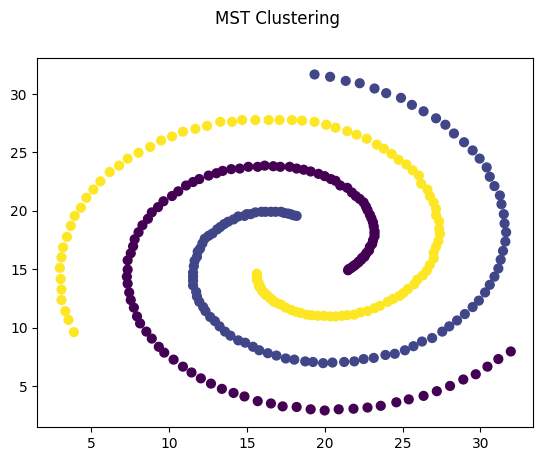

In [183]:
plot(results["spiral"])